# Data Science

## HW4 Part 2 (Character recognition with Keras)

### Character recoginition with Keras

(Thanks to Róbert Pálovics)

In [0]:
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from PIL import ImageOps
import numpy as np
from matplotlib.pyplot import imshow
import pandas.util.testing as tm
sns.set(font="Droid Sans",font_scale = 2)
sns.set_style("white")
sns.set_color_codes("dark")

#### MNIST Dataset
* Pictures of 28x28 pixels
* Possible labels: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 (multi-class classifcation)
* 28x28 = 784 attributes
* Trainging data with 60000 records

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

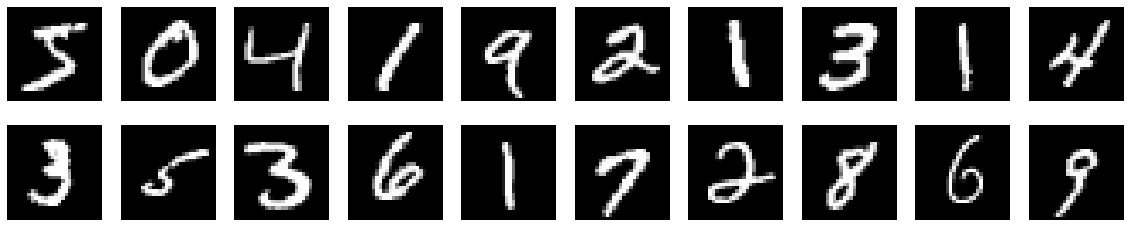

In [52]:
plt.figure(figsize=(20,4))
for i in range(20):
  plt.subplot(2,10,i+1)
  plt.axis('off')
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

In [0]:
from tensorflow.keras.utils import to_categorical
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

 #### Modeling

In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [0]:
model = Sequential([
    Conv2D(64, (5, 5), input_shape=(1, 28, 28), activation='relu', data_format="channels_first"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(15, (3, 3), activation='selu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='selu'),
    Dense(50, activation='selu'),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Further details: http://adventuresinmachinelearning.com/keras-tutorial-cnn-11-lines/

In [0]:
accuracy = []
train_percent = 0.05
iter = 20
for i in range(iter):
    model.fit(X_train[i*int(60000*train_percent):(i+1)*int(60000*train_percent)], y_train[i*int(60000*train_percent):(i+1)*int(60000*train_percent)],batch_size=100, epochs=1,verbose=0, validation_split=0.1)
    score = model.evaluate(X_test, y_test, verbose=0)
    accuracy.append(score[1])

Text(0, 0.5, 'accuracy on the test set')

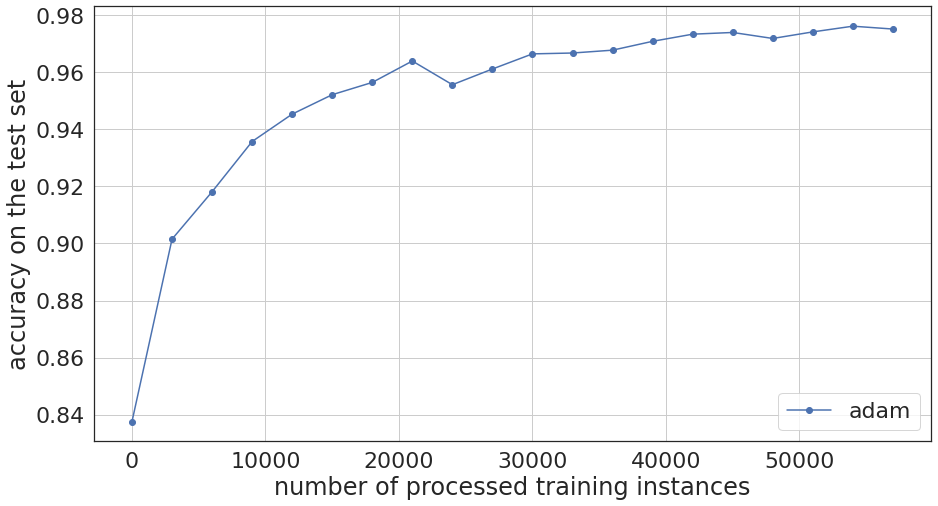

In [57]:
X = np.arange(iter)
plt.figure(figsize=(15,8))
plt.plot(X*int(train_percent*60000),accuracy,"o-",label="adam")
plt.legend(loc=4)
plt.grid()
plt.xlabel("number of processed training instances")
plt.ylabel("accuracy on the test set")

### Testing on own handwritten digits

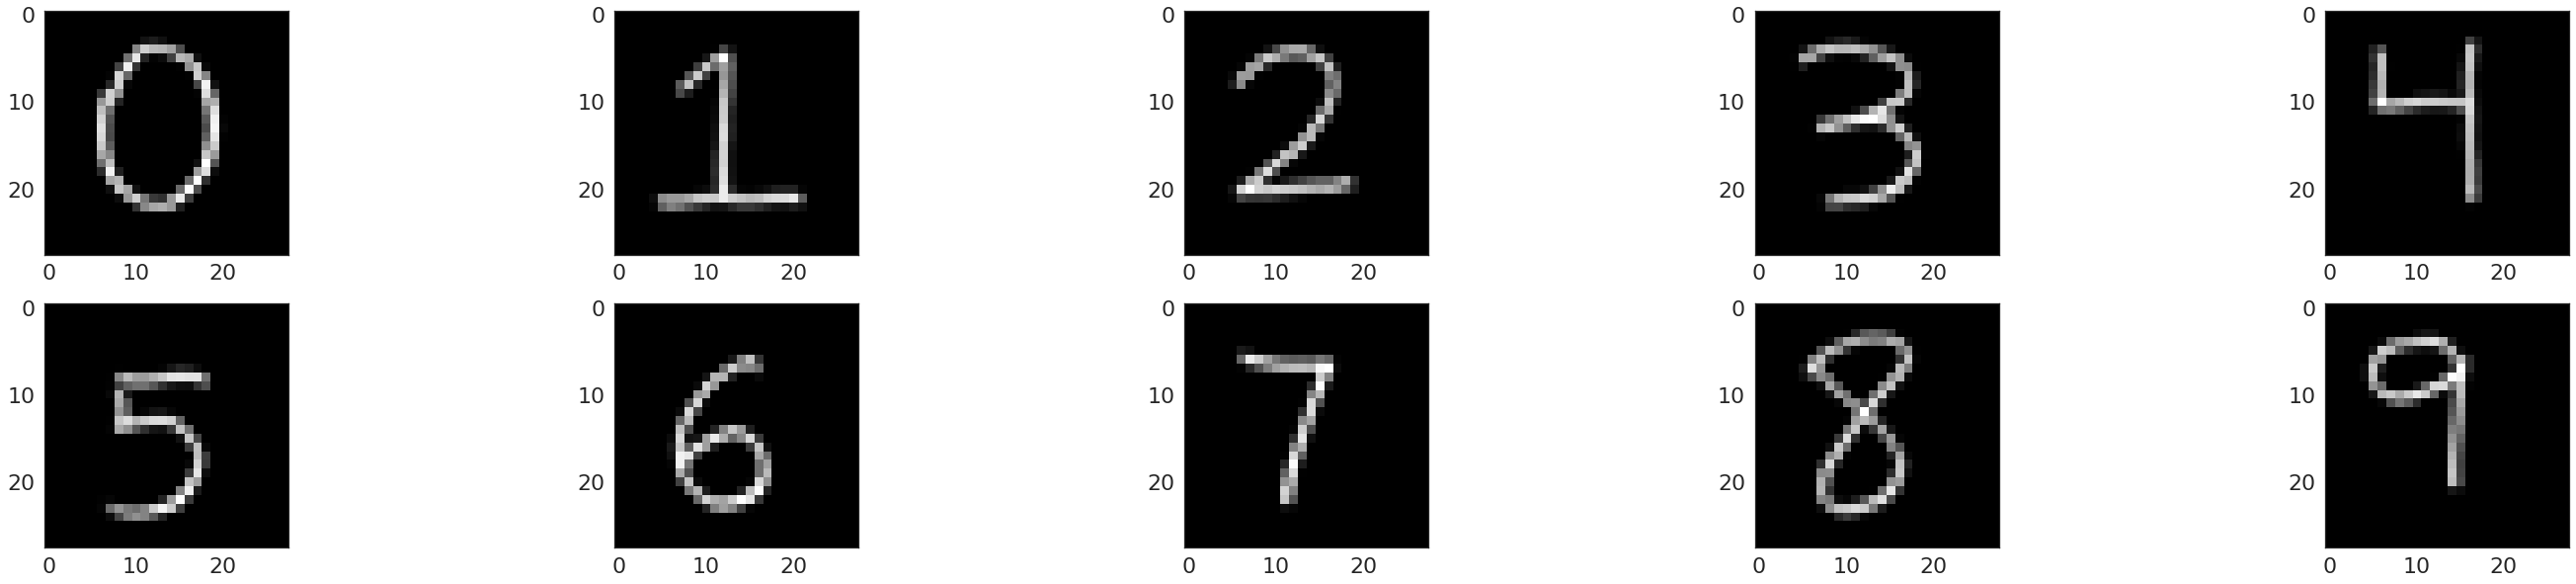

In [58]:
# input my own handwritten digits with new thresholds

# visualizing hand-written digits
thresholds = {}
thresholds[ 0 ] = ( 125 , 100 , 375 , 350 )
thresholds[ 1 ] = ( 400 , 100 , 650 , 350 )
thresholds[ 2 ] = ( 650 , 100 , 900 , 350 )
thresholds[ 3 ] = ( 900 , 100 , 1150 , 350 )
thresholds[ 4 ] = ( 1155 , 100 , 1405 , 350 )

thresholds[ 5 ] = ( 125 , 350 , 375 , 600 )
thresholds[ 6 ] = ( 400 , 350 , 650 , 600 )
thresholds[ 7 ] = ( 650 , 350 , 900 , 600 )
thresholds[ 8 ] = ( 900 , 350 , 1150 , 600 )
thresholds[ 9 ] = ( 1155 , 350 , 1405 , 600 )

import requests

plt.figure( figsize = ( 50 , 10 ) )
for i in range( 10 ):
    response = requests.get("https://elilleshi.github.io/Data-Science/neural-numbers.jpg", stream=True)
    image = Image.open(response.raw)
    width, height = image.size
    image = image.crop( thresholds[ i ] )
    image = ImageOps.invert( image )
    image.thumbnail( ( 28 , 28 ) )
    image_data = np.asarray( image , dtype = np.uint8 )
    image_data = image_data.sum( 2 ).astype( float )
    image_data /= image_data.max()
    plt.subplot( 2 , 5 , i + 1 )
    plt.imshow( image_data, cmap = plt.cm.gray )

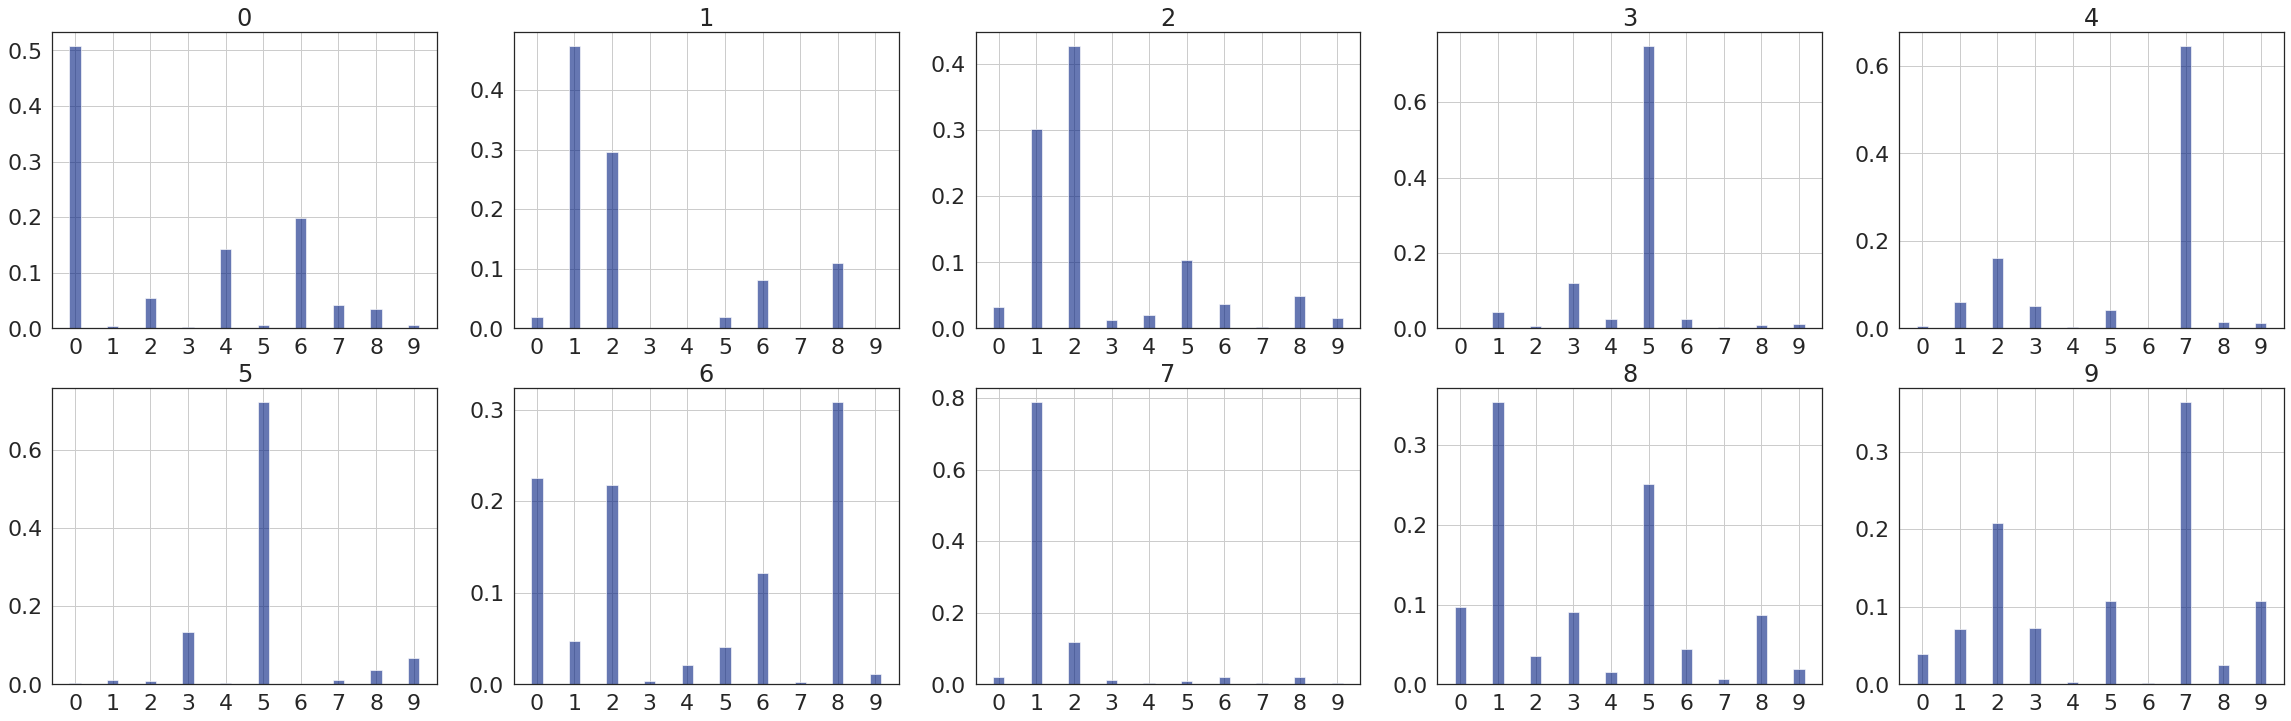

In [59]:
# recognition of my handwritten digits

# using the trained model to recognize hand-written digits
plt.figure( figsize = ( 40 , 12 ) )
for i in range( 10 ):
    response = requests.get("https://elilleshi.github.io/Data-Science/neural-numbers.jpg", stream=True)
    image = Image.open(response.raw)
    width, height = image.size
    image = image.crop( thresholds[ i ] )
    image = ImageOps.invert( image )
    image.thumbnail( ( 28 , 28 ) )
    image_data = np.asarray( image , dtype = np.uint8 )
    image_data = image_data.sum( 2 ).astype( float )
    image_data /= image_data.max()
    image_data = image_data.reshape( 1 , 1 , 28 , 28 )
    predictions = model.predict( image_data > 0.8 )
    plt.subplot( 2 , 5 , i + 1 )
    plt.bar( range( 10 ) , predictions[ 0 ] , 0.3 , color = "b" , alpha = 0.6 )
    plt.title( i )
    plt.grid()
    plt.xticks( range( 10 ) )

In [0]:
## Observation:
# Changing activation function from relu to selu: 8 becomes identified. But changing to “sigmoid” makes the error much larger and the prediction involves more candidates. 
# Increasing Conv2D layers by factors of 2 adversely effects the prediction, as the models can’t recognize 1 or 2 anymore and have more than 1 strong guess. 
# Increasing the parameter of Dense() also negatively impacts the results. 
# Increasing the Dropout() increases the number of possibilities which each number might be.
# adam optimizer performs the best of all the included optimizers  

# The model recognizes 0, 1, 2, 5, and 6 and 8 a little bit. 